RMSE: 1504.47 kWh
MAE: 1307.22 kWh


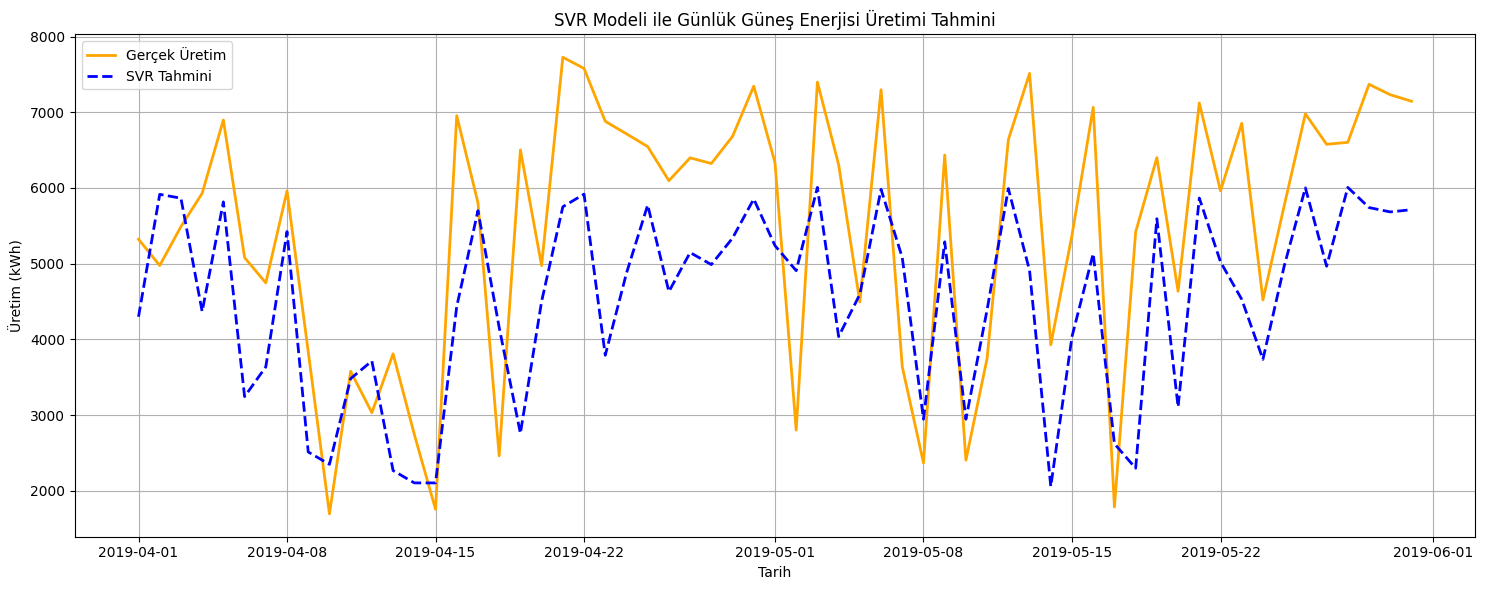

In [8]:
# 📦 Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Veriyi yükle ve sırala
df = pd.read_excel(r"C:\Users\alpgu\OneDrive\Desktop\DSA PROJECFT\train_data.xlsx")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

# Ay bilgisi çıkar
df["Month"] = df["Date"].dt.month

# 
X = df[["CloudCover_%", "Month"]]
y = df["Üretim (kWh)"]

#Eğitim-test ayrımı (%80 eğitim, %20 test)
n = len(df)
train_size = int(n * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

#Özellikleri standardize et
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#SVR modeli (en iyi parametrelerle)
svr_model = SVR(kernel="rbf", C=1000, epsilon=100, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

#Tahmin yap
y_pred = svr_model.predict(X_test_scaled)

#Hata metriklerini yazdır
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # elle karekök al
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f} kWh")
print(f"MAE: {mae:.2f} kWh")

#Grafik: Gerçek vs Tahmin
plt.figure(figsize=(15, 6))
plt.plot(df["Date"].iloc[train_size:], y_test.values, label="Gerçek Üretim", color="orange", linewidth=2)
plt.plot(df["Date"].iloc[train_size:], y_pred, label="SVR Tahmini", color="blue", linestyle="--", linewidth=2)
plt.title("SVR Modeli ile Günlük Güneş Enerjisi Üretimi Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Üretim (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Full explanation of what this model does, both practically and theoretically:


1) ```from sklearn.svm import SVR```
    What does it do (practical use)?
        This line imports the Support Vector Regression (SVR) model from scikit-learn.  It allows you to build a machine learning model that predicts continuous numerical values (like energy production in this case).

    Theoretical explanation:
        SVR is the regression version of Support Vector Machines (SVM). The goal is to find a function (usually nonlinear) that approximates the relationship between inputs and outputs, while allowing a margin of tolerance (called epsilon).
        It’s especially useful when the relationship between features and targets is not linear.

        The model tries to:
            Fit the data within an epsilon-wide margin.

2) ```from sklearn.preprocessing import StandardScaler```
    What does it do (practical use)?
        This is used to standardize your feature, it scales all features to have mean = 0 and standard deviation = 1.

    Theoretical explanation:
        Many ML algorithms (including SVR) are sensitive to the scale of input features.If one feature is in the range [0, 1] and another is in [0, 1000], the model might give more weight to the one with the larger scale, even if it's not more important.
        Standardization solves this by transforming every feature 𝑥  using:
        ![image.png](https://miro.medium.com/v2/resize:fit:1024/0*GBTrgXhXYxVIB263.png)

        where:
            μ: mean of the feature
            σ: standard deviation

3) ```from sklearn.metrics import mean_squared_error, mean_absolute_error```
    What does it do (practical use)?
        These are evaluation metrics. They help measure how good (or bad) your model’s predictions are.

    Theoretical explanation:
        1. Mean Squared Error (MSE):
            Measures the average squared difference between predicted and actual values.
            Formula:
                ![image.png](ahttps://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)

            Penalizes larger errors more heavily (because of squaring).

        2.Mean Absolute Error (MAE):
            Measures the average of the absolute differences between predicted and actual values.
                Formula:
                    ![image.png](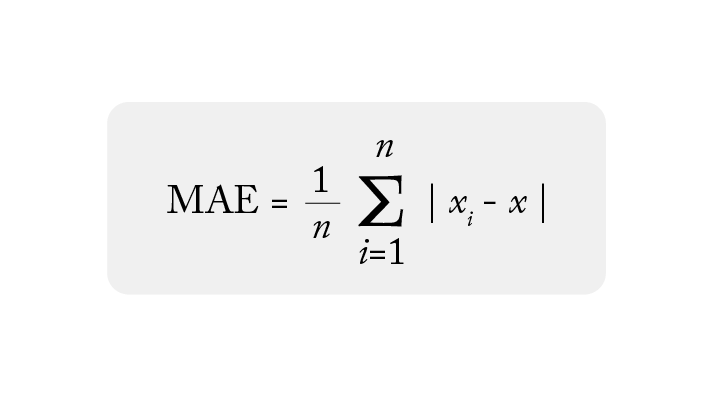)
            
            More robust to outliers than MSE.

4) ``` n = len(df) ``` # gets the total number of rows (samples) in the dataset df.

    ```train_size = int(n * 0.8)``` #Calculates the size of the training set as 80% of the total data.

    ```X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]``` #Splits the feature matrix (X) into training and testing sets. X here includes "CloudCover_%" and "Month"

    ```y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]``` Does the same split for the target values (y), which are the solar energy outputs in kWh.

5)  ```scaler = StandardScaler()``` #This creates an instance of StandardScaler from scikit-learn. This object will standardize your features (i.e., rescale them to have mean = 0 and standard deviation = 1).

   ```X_train_scaled = scaler.fit_transform(X_train)``` #This does two things: fit: calculates the mean and standard deviation of each column in X_train and transform: applies the standardization formula.

    ```X_test_scaled = scaler.transform(X_test)``` #This transforms the test data using the same mean and standard deviation from the training set.

6) ```svr_model = SVR(kernel="rbf", C=1000, epsilon=100, gamma=0.1)```

   ```svr_model.fit(X_train_scaled, y_train)```
    ## Explanation ##
    kernel="rbf" = RBF kernel (Radial Basis Function). Allows modeling nonlinear relationships

    C=1000 = Regularization strength. Controls how much you penalize errors.

    epsilon=100 = Tolerance margin. How much error you’re willing to accept without penalty

    gamma=0.1 = Kernel coefficient. Controls how far the influence of a single data point reaches
    

   ``` svr_model.fit``` = This trains (fits) the model on the scaled training data: It learns the support vectors, i.e., the critical data points that define the regression boundary. The model creates a function that tries to stay within ± epsilon margin of the real data, while keeping the function as smooth as possible.

7) ```y_pred = svr_model.predict(X_test_scaled)```
    #This line uses the trained SVR model to make predictions on unseen data (X_test_scaled). X_test_scaled was never used during training — so this mimics how the model would behave in the real world. The output, y_pred, is an array of predicted energy production values (in kWh), same shape as y_test.


   ```mse = mean_squared_error(y_test, y_pred) ```# Computes the Mean Squared Error (MSE) between actual and predicted values. This penalizes large errors more heavily because the differences are squared. Useful when you want to focus on bigger mistakes.


    ```rmse = np.sqrt(mse) ``` #Takes the square root of MSE to get Root Mean Squared Error. RMSE has the same unit as the target (kWh), which makes it easier to interpret.


   ``` mae = mean_absolute_error(y_test, y_pred) ```#Computes the Mean Absolute Error (MAE). Unlike MSE, this treats all errors equally, regardless of size. It’s more robust to outliers.



